In [110]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as scp
import numpy.linalg as nplin
from scipy.integrate import solve_bvp

In [134]:
# Cálculo de los autovalores por el método de Numerov

# Arreglo de puntos sobre el eje x en donde se calcula la solución. Discretización del espacio.
xarray = np.linspace(-10,10,200)
N = len(xarray)
L = xarray[len(xarray)-1]- xarray[0] 
l = 20/(N-1)

# Constantes
h = 1.054571628*10**(-34) 
m = 1.6726219*10**(-27)
gamma2 = (2*m*L**2)/h**2

# Potencial
V_0 = xarray**2          # Evaluar la función en el arreglo xarray#################################

# Método Numerov
A = np.eye(N,N,1) + np.eye(N,N,-1) - 2*np.eye(N,N)
V = V_0*np.eye(N,N)
B = np.linalg.inv((1/12)*(np.eye(N,N,1) + np.eye(N,N,-1) + 10*np.eye(N,N)))
W = -1/(gamma2*l**2)*np.matmul(B,A) + V

# Se considera la condición de frontera en la función de onda en el infinito
W[:,0] = 0
W[:,N-1] = 0

# Matríz a resolver autovalores
np.set_printoptions(precision = 4)
print("\nMatríz a resolver autovalores:\n\n", W)

# Arreglo de autovalores
eigval = np.sort(nplin.eig(W)[0]) 
print('\n\n Autovalores de menor a mayor:\n\n ',eigval)


# Considerando solamente los 4 positivos más pequeños
eigval4 = []

for i in range(0,len(eigval)):
    if eigval[2*i]>0:
        eigval4.append(eigval[2*i])
        
    if len(eigval4) == 4:
        eigval4 = np.array(eigval4)
        break

print("\n\nLos cuatro primeros autovalores son:\n\n", eigval4)


Matríz a resolver autovalores:

 [[ 0.0000e+000 -1.2092e-042  1.2215e-043 ... -8.8464e-238  8.9358e-239
   0.0000e+000]
 [ 0.0000e+000  9.8000e+001 -1.2215e-042 ...  8.8464e-237 -8.9358e-238
   0.0000e+000]
 [ 0.0000e+000 -1.2215e-042  9.6020e+001 ... -8.7580e-236  8.8464e-237
   0.0000e+000]
 ...
 [ 0.0000e+000  8.8464e-237 -8.7580e-236 ...  9.6020e+001 -1.2215e-042
   0.0000e+000]
 [ 0.0000e+000 -8.9358e-238  8.8464e-237 ... -1.2215e-042  9.8000e+001
   0.0000e+000]
 [ 0.0000e+000  8.9358e-239 -8.8464e-238 ...  1.2215e-043 -1.2092e-042
   0.0000e+000]]


 Autovalores de menor a mayor:

  [0.0000e+00 0.0000e+00 2.5252e-03 2.5252e-03 2.2727e-02 2.2727e-02
 6.3130e-02 6.3130e-02 1.2373e-01 1.2373e-01 2.0454e-01 2.0454e-01
 3.0555e-01 3.0555e-01 4.2676e-01 4.2676e-01 5.6817e-01 5.6817e-01
 7.2978e-01 7.2978e-01 9.1159e-01 9.1159e-01 1.1136e+00 1.1136e+00
 1.3358e+00 1.3358e+00 1.5782e+00 1.5782e+00 1.8409e+00 1.8409e+00
 2.1237e+00 2.1237e+00 2.4267e+00 2.4267e+00 2.7499e+00 2.7499e+00


In [135]:
# Coordenada normalizada
xarray = xarray/10

# Ecuación de Schrödinger como un sistema lineal
def SchrodingerOscilador(x,y):                                    ### ojooooo   constantesss
    return np.vstack([y[1], -gamma2*(eigval4[0] - x**2)*y[0]])       ###   ojoooo  con el autovalor de energía

# Función de condiciones de frontera.
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [136]:
y = np.zeros((2, xarray.size))
#print(y)

In [137]:
sol = solve_bvp(SchrodingerOscilador, bc, xarray, y)

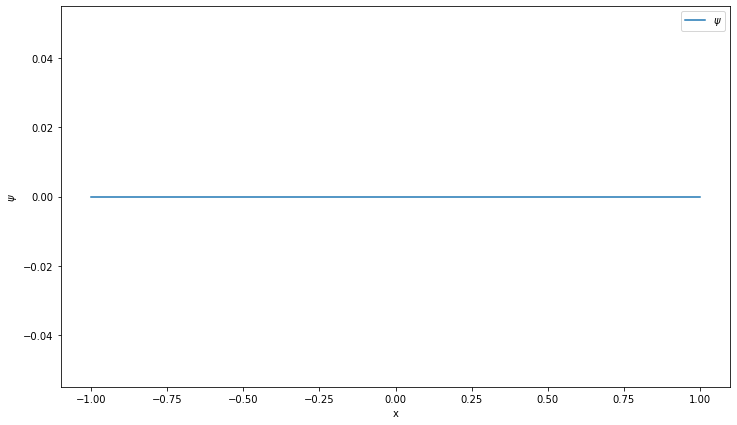

In [138]:

x_plot = xarray
psi_plot = sol.sol(x_plot)[0]
#print(psi_plot)
#print(x_plot)

fig = plt.figure(figsize = (12,7))    

plt.plot(x_plot, psi_plot,label='$\psi$')
#plt.plot(x_plot, x_plot**2,label='x²')

plt.legend()
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.show()